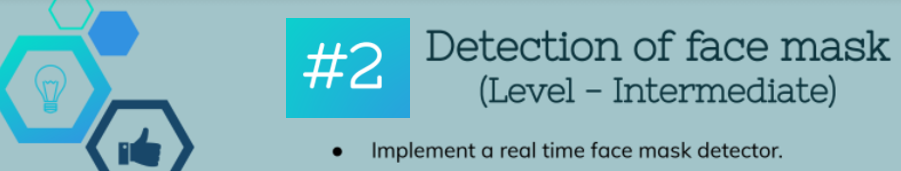

In [ ]:
# The following "#" will dictate the quick information associated with the codes and its execution.
# Feel free to use Google Search whenever you want to find the full information about the codes and its backend algorithm work. 

In [ ]:
# Step 1: Install the Packages
# Open Command Prompt and start installing the packages by executing the followinbg codes
# pip install tensor flow
# pip install Keras
# pip install imutils
# pip install numpy
# pip install opencv-python 
# pip install matplotlib
# pip install argparse
# pip install scipy 

In [ ]:
# Step 2: Data what we have got!

In [ ]:
# Dataset containing Photoes with Mask

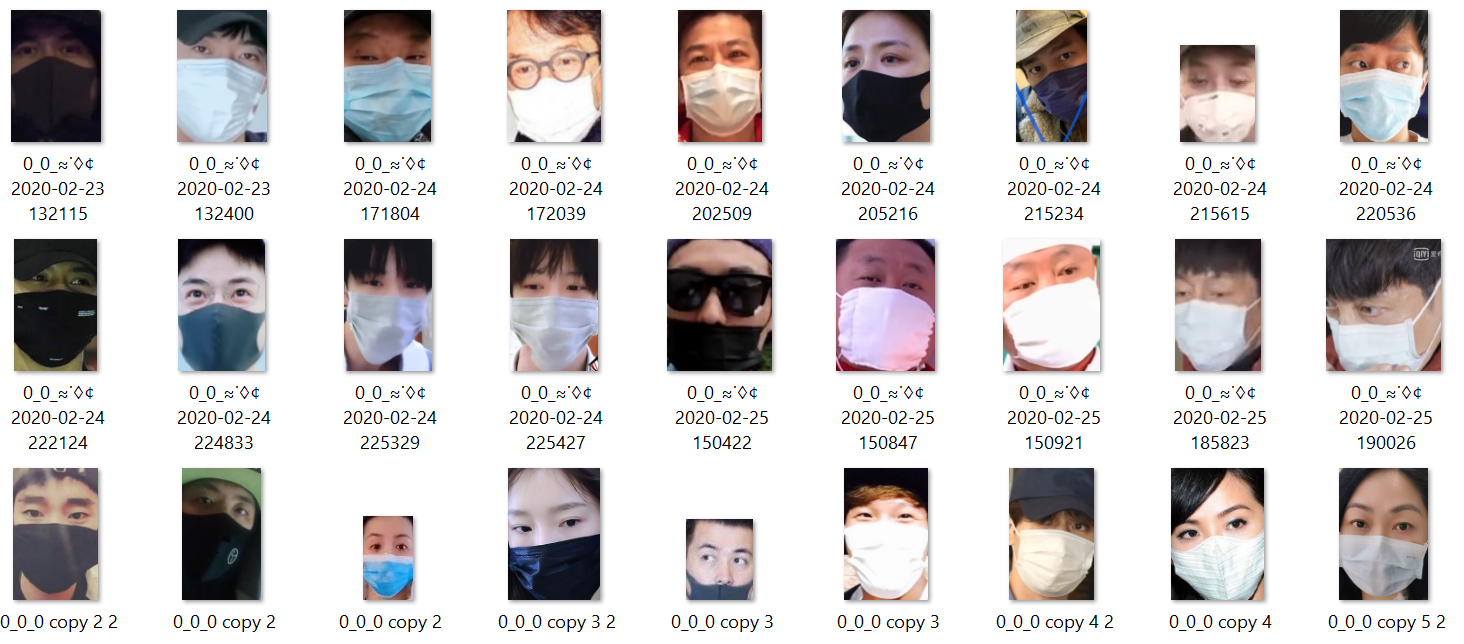

In [ ]:
# Dataset containing Photoes without Mask

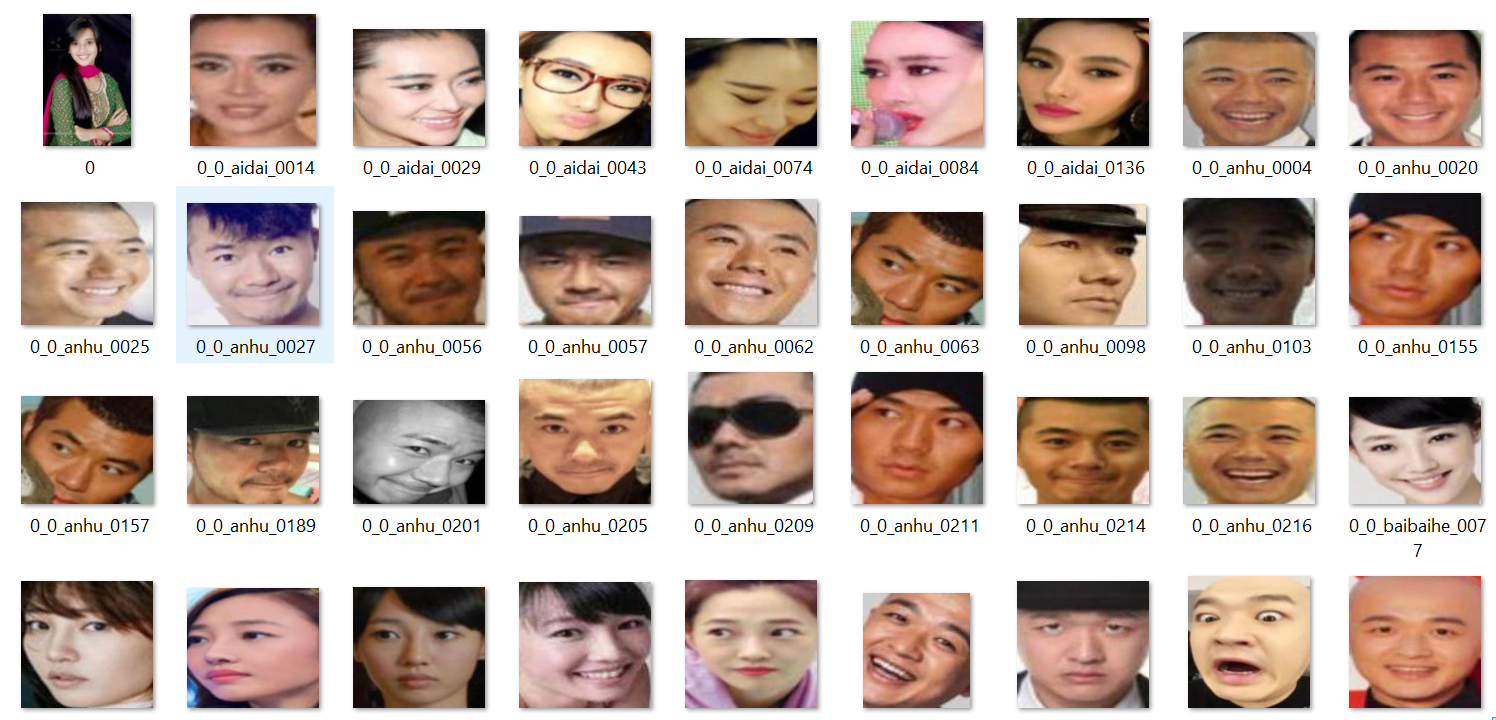

In [ ]:
# Step 3: Data Preprocessing

In [ ]:
# In this we mainly focus on converting all our images( with and without mask) into arrays. So that we can ultimately create 
# a Deep Learning Model with those arrays 

In [ ]:
# Import the Packages
# Will try to cover the short explanation of the imports as we process with code. 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
# After installing and importing all the packages. You may still find yourself struggling with the "imutils" Package.
# So i recommend install the imutil package again on CMD than on Jupyter notebook as i have done below. 
# In case still it is not executable i recommend restart your Kernel or restart your PC and repeat the process once more.
# This time you will make it for sure.

In [ ]:
pip install imutils

In [ ]:
from imutils import paths

In [ ]:
# Change the working directory path as per your repository - saved location on your dekstop
# Here i am making a variable by the name "DIRECTORY" that holds my "Dataset" location path 
# Also making a list by the name off " CATEGORIES" that holds two names "with mask" and "without mask" that are nothing but the 
# names of my subfolders inside the main "Dataset" folder.

In [ ]:
DIRECTORY = r"C:\Users\hp\Desktop\Data Science\TSF\task Object detection and OCR\facemask\Face-Mask-Detection-master\dataset"
CATEGORIES = ["with_mask", "without_mask"]

In [ ]:
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")

In [ ]:
# Now we are creating two empty list
# Inside the data list i will append all the image arrays.
# Inside the Labels list i will append the corresponding image labels that it is images "without mask" or "with mask"

In [ ]:
data = []
labels = []

In [ ]:
# Now i am looping through a variable "category" in our "CATEGORIES" 
# With "os.path.join" i am joining the "DIRECTORY" and the "category" to give a "path" that is showing 
# "DIRECTORY" is my main folder of "dataset" thats contain two subfolders of with and without mask as represented by "category"
# So overall we are first looping for "with mask" and than for " without mask" folders
# Later the "os.listdir" will list out all the images inside that particular directory.
# After that we will join the paths of the particular label with the corresponding image 
# All this will let the for loop to bifurcate our images with a label of with and without mask taking reference from the 
# main and subfolders names.
# The Package " tensorflow.keras.preprocessing.image " will help to load the image where we give the target size(224,224)
# that will convert all the images size into height and width of 224,224. 
# Once i load the image will save that to a variable called as image and than will convert the image into an array 
# using img_to_array(image to array function)
# Now we will use "proprocess_input" that is mobile nets for this particular model
# Now we have finally converted all the images into arrays ans we have preprocess the input successfully 
# At last we will append the image arrays and their corresponding labels in our previously created empty list.

In [ ]:
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
    	img_path = os.path.join(path, img)
    	image = load_img(img_path, target_size=(224, 224))
    	image = img_to_array(image)
    	image = preprocess_input(image)

    	data.append(image)
    	labels.append(category)

In [ ]:
# Now we have all the images as an array in numerical forms but the labels are still alphabetical value 
# that is ( with mask and without mask )
# But all these text characters will not be useful for us. 
# So we will convert them using Feature engineering technique of One Hot Encoding 
# In order to do this we are calling a LabelBinarizer method that is coming from package "sklearn.preprocessing" 
# With this we are converting the With and Without mask Labels into categorical labels of 0 and 1  

In [ ]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [ ]:
# Now we will convert all the numerical data and labels into Numpy arrays since only with arrays deep learning model will work.
# After this we train test spilt to split my training and testing data (80-20) percent basis

In [ ]:
data = np.array(data, dtype="float32")
labels = np.array(labels)
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

In [1]:
# STEP 4: Training the Model

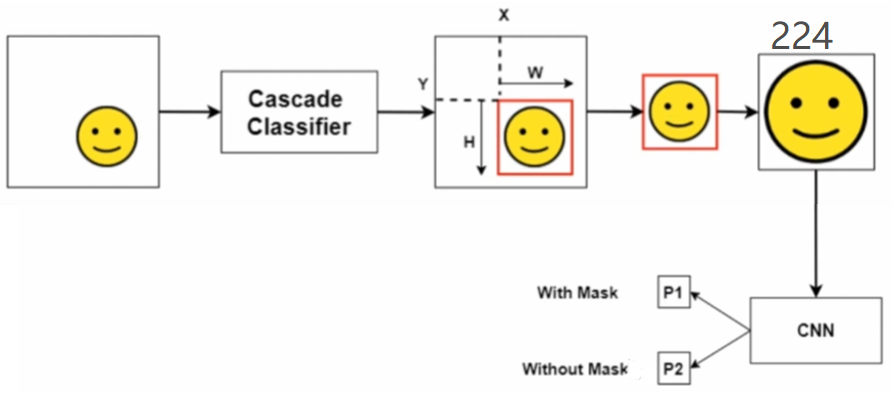

In [ ]:
# CNN that we are using here is : MObileNet Convolutional neural network 
# Feel free to use Google search for studying about MobileNet CNN 

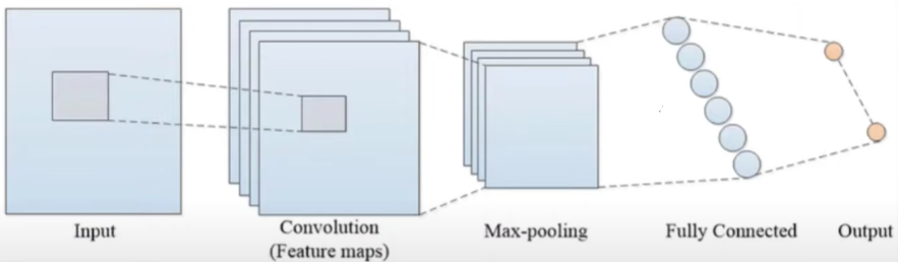

In [ ]:
# When the image is is processed as an array. We will send them in our MobileNet CNN < After that we will do the Maxpooling and 
# << than will flatten it and than << will create a fully connected layer and get the output.


In [ ]:
# Inotially we will give the initial learning rate to be 1e-4(0.0001), that will ensure my learning rate is less so that my loss 
# can be calculated properly which will ensure the better accuracy of the model.
# Also has given 20 Epochs and 20 as Batchsize.
# You may also use some other value of EPOCHS and Batchsize but i got model accuracy at the used parameters.

In [ ]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

In [ ]:
# Now we are using ImageDataGenerator which create a Data Augmentation. So it creates many images with a single image by 
# adding various techniques like Flipping, Rotating the image, shifting the image etc that changes the image propoerties.

In [ ]:
# construct the training image generator for data augmentation
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [ ]:
# By using MobileNet CNN we are developing to types of Models here 
# First Model is MobileNet model(HEAD MODEL) whose output we are going to pass in the normal model(BASE MODEL)
# that we are going to develop. 

In [ ]:
# Hence we are crteating a Base Model here we have a parameter called [ weights= "Imagenet" ]. There are some pre trained
# models specifically for images. So when we used this Imagenet those weights will be initialised for us which will 
# give us better results. 
# Though the Weights are defaulted to NULL but we will imagenet here.
# include_top = False where include_top is actually a Boolean Value which is to say whether include the fully connected layer
# to the top of our network. 
# We will connect the fully connected layer later by ourselves hence we are setting it to FALSE but its default is TRUE. 
# Input_tensor is the shape of the image that is going through where 224 represent the height and width of the image 
# and 3 represent the standard colour combination channel of Red, Blue and Green. 

In [ ]:
# load the MobileNetV2 network, ensuring the head FC layer sets are
# left off
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

In [ ]:
# Now we will construct our fully connected layer by using the Max Pooling 

In [ ]:
# In the following code
# we are creating a HeadModel Object in whuch we are passing the our base model output 
# than we are creating the pooling of size 7 * 7
# Later we are flattening the layers and than adding a dense layer of 128 Neurons where my activation layer is RELU
# Relu is basically the GOTO activation function for non linear used cases. 
# we are also using DROPOUT just to avoid the overfitting of our models
# and than we are going to our final output model, where our model is of 
# two layers one is with mask and other one is without mask 
# giving the activation function as softmax. Generally in the output layers you can always go for softmax activation function 
# or a sigmoid activation function because they are probability based 0 or 1 values. So since we are dealing with binary
# classification here hence we have given SOFTMAX as my acvtuvation function. 

In [ ]:
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

In [ ]:
# Now we need to call the model function which accepts two parameters where one is input and othetr is output 
# So as we have decided that out base mdoel will be the input and the head model will be the output 

In [ ]:
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

In [ ]:
# Now we are freezing the layers in the base model. So they will not be updated during the first training process 
# because they are just the replacement for the CNN. SO we are hust freezing them for training.  

In [ ]:
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

In [ ]:
# Here in the compiling zone we are giving the initial learning rate giving the decay and for the loss function we are 
# giving binary cross entropy. The optimizer heer we are using here is ADAM that is similar to Relu which serves as 
# GOTO optimizer for any image prediction methods. 
# We will also trach the accuracy metrics here that is the only metric that we are going to track for.

In [ ]:
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

In [ ]:
# Now we will tarin our data 
# HAVE PATIENCE BECAUSE TRAINING THE MODEL WILL TAKE TIME.

In [ ]:
# train the head of the network
print("[INFO] training head...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

In [ ]:
# Now we will evaluate our network by using Model.predict method 

In [ ]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

In [ ]:
# Similarly for each image in the testing set we need to find the index of the label corresponding 
# to the largest predicting probability in order to do this we are using np.argmax 

In [ ]:
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

In [ ]:
# SO now we can get the classification report with the very good formatting 

In [ ]:
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

In [ ]:
# Now we are sasving our generated model in H5 format 

In [ ]:
# serialize the model to disk
print("[INFO] saving mask detector model...")
model.save("mask_detector.model", save_format="h5")

In [ ]:
# Finally now we are going to plot our accuracy and metrics by using Matplotlib 
# Step 5: Run and View the ACCURACY Vs Training Loss

In [ ]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

In [ ]:
# Step6: Apply the Model in the Camera
# Till now we havbe done mask detection but now we will also do the face detection 
# We have got two files in repository folder name Face_detector
# Now we need camera operation for Face detection and for that we will use open OPEN CV.

In [ ]:
from tensorflow.keras.models import load_model
import time
import cv2
from imutils.video import VideoStream
import imutils

In [ ]:
#  Here will find out the return value of locations and predictions on the behalf of our models of face and mash detection 
# Location is the x,y coordinate of particular rectangle surrounding the face.
# Prediction is the accuracy of detecting the person wearing the mask or not.


In [ ]:
def detect_and_predict_mask(frame, faceNet, maskNet):
	# grab the dimensions of the frame and then construct a blob
	# from it
	(h, w) = frame.shape[:2]
	blob = cv2.dnn.blobFromImage(frame, 1.0, (224, 224),
		(104.0, 177.0, 123.0))
    
# pass the blob through the network and obtain the face detections
	faceNet.setInput(blob)
	detections = faceNet.forward()
	print(detections.shape)
    	# initialize our list of faces, their corresponding locations,
	# and the list of predictions from our face mask network
	faces = []
	locs = []
	preds = []
    	# loop over the detections
	for i in range(0, detections.shape[2]):
		# extract the confidence (i.e., probability) associated with
		# the detection
		confidence = detections[0, 0, i, 2]
        
		# filter out weak detections by ensuring the confidence is
		# greater than the minimum confidence
		if confidence > 0.5:
			# compute the (x, y)-coordinates of the bounding box for
			# the object
			box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
			(startX, startY, endX, endY) = box.astype("int")
			# ensure the bounding boxes fall within the dimensions of
			# the frame
			(startX, startY) = (max(0, startX), max(0, startY))
			(endX, endY) = (min(w - 1, endX), min(h - 1, endY))
            
            			# extract the face ROI, convert it from BGR to RGB channel
			# ordering, resize it to 224x224, and preprocess it
			face = frame[startY:endY, startX:endX]
			face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
			face = cv2.resize(face, (224, 224))
			face = img_to_array(face)
			face = preprocess_input(face)
            
            			# add the face and bounding boxes to their respective
			# lists
			faces.append(face)
			locs.append((startX, startY, endX, endY))
            	# only make a predictions if at least one face was detected
	if len(faces) > 0:
		# for faster inference we'll make batch predictions on *all*
		# faces at the same time rather than one-by-one predictions
		# in the above `for` loop
		faces = np.array(faces, dtype="float32")
		preds = maskNet.predict(faces, batch_size=32)
        
        	# return a 2-tuple of the face locations and their corresponding
	# locations
	return (locs, preds)

In [ ]:
# Facenet is the file for the Face detection and hence we are using that by giving there paths and saving them in a variable.
# In order to use them we are using a method known as readnet which is under CV2 and the model called as DNN
# Now we can use the particular Facenet to detect the face. 

In [ ]:
# load our serialized face detector model from disk
prototxtPath = r"C:\Users\hp\Desktop\Data Science\TSF\task Object detection and OCR\facemask\Face-Mask-Detection-master\face_detector\deploy.prototxt"
weightsPath = r"C:\Users\hp\Desktop\Data Science\TSF\task Object detection and OCR\facemask\Face-Mask-Detection-master\face_detector\res10_300x300_ssd_iter_140000.caffemodel"
faceNet = cv2.dnn.readNet(prototxtPath, weightsPath)

In [ ]:
# Similarly we are using our model by load_model( model that we used for mask detection) 
# Now we haev both the models for Face and MAsk detection.

In [ ]:
# load the face mask detector model from disk
maskNet = load_model("mask_detector.model")

In [ ]:
# Now we have to load our Camera and we are using VideoStream function for that where the SRC=0 that is the source.
# We can change the source as per the availability of the camera but since now i have only 1 primary camera so i havce taken 
# src=0. 

In [ ]:
# initialize the video stream
print("[INFO] starting video stream...")
vs = VideoStream(src=0).start()

In [ ]:
# While looping of for the image(frames). Here every image is flowing sequentially.   
# With Sequential Frame per second the each frame will appear as a video.
# After you rtead the frame or just open the frame, a dialogue box frame of width 400 appears 

In [ ]:
# loop over the frames from the video stream
while True:
	# grab the frame from the threaded video stream and resize it
	# to have a maximum width of 400 pixels
	frame = vs.read()
	frame = imutils.resize(frame, width=400)
    
    	# detect faces in the frame and determine if they are wearing a
	# face mask or not
	(locs, preds) = detect_and_predict_mask(frame, faceNet, maskNet)
    	# loop over the detected face locations and their corresponding
	# locations
	for (box, pred) in zip(locs, preds):
		# unpack the bounding box and predictions
		(startX, startY, endX, endY) = box
		(mask, withoutMask) = pred
        		# determine the class label and color we'll use to draw
		# the bounding box and text
		label = "Mask" if mask > withoutMask else "No Mask"
		color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
        		# include the probability in the label
		label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
        		# display the label and bounding box rectangle on the output
		# frame
		cv2.putText(frame, label, (startX, startY - 10),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
		cv2.rectangle(frame, (startX, startY), (endX, endY), color, 2)
        	# show the output frame
	cv2.imshow("Frame", frame)
	key = cv2.waitKey(1) & 0xFF
    	# if the `q` key was pressed, break from the loop
	if key == ord("q"):
		break

In [ ]:
# Step7 Lets see the Final Results

In [ ]:
# do a bit of cleanup
cv2.destroyAllWindows()
vs.stop()